In [1]:
import torch
import numpy as np
import math
import time
import matplotlib.pyplot as plt

## 线性回归的基本元素
---

## 矢量化加速
---

In [2]:
class Timer:
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()
    def start(self):
        """启动计时器"""
        self.tik = time.time()
    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]
    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)
    def sum(self):
        """返回时间总和"""
        return sum(self.times)
    def cumsum(self):
        """返回累计时间"""
        return np.cumsum(self.times).tolist()

In [3]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)
c = torch.zeros_like(a)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.20696 sec'

In [4]:
timer.start()
d = a+b
f'{timer.stop():.5f} sec'

'0.00054 sec'

## 正态分布与平方损失
---

In [8]:
def normal(x, mu, sigma):
    p = 1/math.sqrt(2*math.pi*sigma**2)
    return p*np.exp(-0.5*(x-mu)**2/sigma**2)

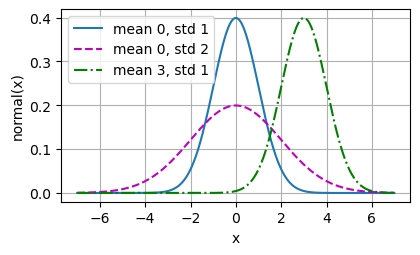

In [9]:
x = np.arange(-7, 7, 0.01)
params = [(0,1), (0,2), (3,1)]

plt.rcParams['figure.figsize'] = (4.5, 2.5)
fmts = ('-', 'm--', 'g-.', 'r:')

legends = [f'mean {mu}, std {sigma}' for mu, sigma in params]
xlabel = 'x'
ylabel = 'normal(x)'
xlim = None
ylim = None
xscale = 'linear'
yscale = 'linear'

for i, (mu, sigma) in enumerate(params):
    plt.plot(x, normal(x, mu, sigma), fmts[i])

axes = plt.gca()
axes.set_xlim(xlim)
axes.set_ylim(ylim)
axes.set_xlabel(xlabel)
axes.set_ylabel(ylabel)
axes.set_xscale(xscale)
axes.set_yscale(yscale)
axes.legend(legends)
axes.grid()


## 从线性回归到深度网络
---

## Exercises
---

1. 假设我们有一些数据$x_1,...,x_n \in R$。我们的目标是找到一个常数$b$，使得最小化$\sum_i(x_i-b)^2$。

    (1) 找到最优值$b$的解析解
    (2) 这个问题及其解与正态分布有什么关系

2. 推导出使用平方误差的线性回归优化问题的解析解。为了简化问题，可以忽略偏置$b$
（我们可以通过向$X$添加所有值为$1$的一列来做到这一点）
    (1) 用矩阵和向量表示法写出优化问题（将所有数据视为单个矩阵，将所有目标值视为单个向量
    (2) 计算损失对$w$的梯度。
    (3) 通过将梯度设为$0$、求解矩阵方程来找到解析解
    (4) 什么时候可能比使用随机梯度下降更好？这种方法何时会失效？

3. 假定控制附加噪声的噪声模型是指数分布。也就是说$p(\epsilon)=\frac{1}{2}exp(-|\epsilon|)$
    (1) 写出模型$-logP(y|X)$下数据的负对数似然。
    (2) 请试着写出解析解。
    (3) 提出一种随机梯度下降算法来解决这个问题。哪里可能出错？（提示：当我们不断更新参数时，在驻点附近会发生什么情况）请尝试解决这个问题。
